In [149]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
from matplotlib import gridspec

import generate_global_features_2 as ggf
from matplotlib.backends.backend_pdf import PdfPages

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/var/tmp/ff/tcc/code/generate_global_features_2.py'>

In [126]:
data_call = util.create_list_with_dir_and_number('call')
data_song = util.create_list_with_dir_and_number('song')

In [127]:
len(data_call)

77

In [128]:
def sum_files(data):
    num_files = 0
    for d in data:
        num_files += d[1]
    return num_files

In [129]:
sum_files(data_call)

674

In [130]:
sum_files(data_song)

1631

In [131]:
y = []
for d in data_song:
    y += [d[1]]

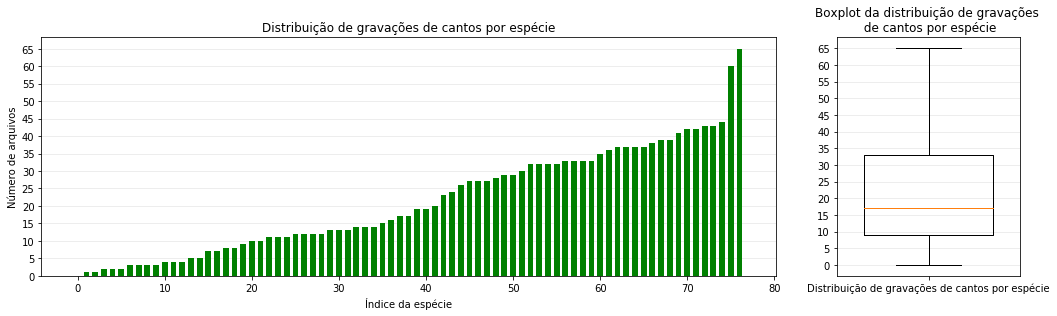

In [177]:
#plt.plot(num_file)
fig = plt.figure(figsize=(15,4.5))

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
#ax = fig.add_subplot(121)
N = len(y)
x = range(N)
width = 1/1.5
plt.yticks(np.arange(min(y), max(y)+1, 5.0))
ax0.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax0.set_axisbelow(True)

plt.bar(x, y, width, color="green")

plt.xlabel("Índice da espécie")
plt.ylabel("Número de arquivos")
plt.title("Distribuição de gravações de cantos por espécie")


#ax = fig.add_subplot(122)
ax1 = plt.subplot(gs[1])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.set_axisbelow(True)
plt.yticks(np.arange(min(y), max(y)+1, 5.0))
bp = plt.boxplot(y, widths=[0.7])
#ax.set_xticks([1])
ax1.set_xticklabels(['Distribuição de gravações de cantos por espécie'])
#ax1.get_xaxis().tick_bottom()
#ax1.get_yaxis().tick_left()

plt.title("Boxplot da distribuição de gravações \n de cantos por espécie")


plot = fig.tight_layout()

pp = PdfPages('distribuicao_arquivos.pdf')
pp.savefig(plot)
pp.close()

#plt.bar(num_file, 78)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc70a66a940>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc70a672940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc70a676eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc70a6764e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc70a66abe0>,
  <matplotlib.lines.Line2D at 0x7fc70a670f28>]}

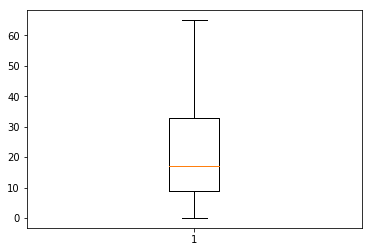

In [111]:
plt.boxplot(y)

In [2]:
def all_dirs(full_or_pulse = 'full'):
    # Return list of directories with species randomly choosen
    dirs = []
    for i in range(len(util.NAME_SPECIES_NUM_DIR)):
        specie = util.NAME_SPECIES_NUM_DIR[i]
        if full_or_pulse == 'full':
            dir = util.DATA_DIR_BASE + '-' + specie[-1] + '/' + specie[:-2] + '/'
        else:
            dir = util.DATA_DIR_PULSE_BASE + '-' + specie[-1] + '/' + specie[:-2] + '/'
        dirs.append(dir)
    return dirs


In [3]:
dirs = all_dirs()

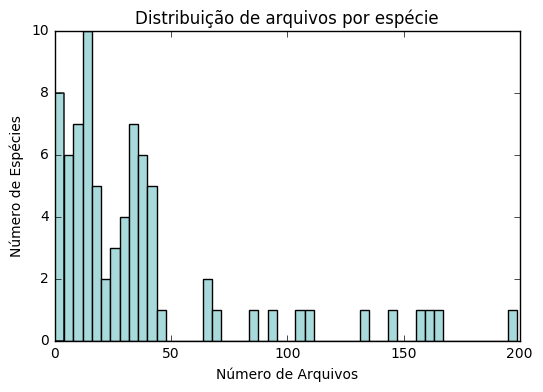

In [5]:
num_files = []

for dir in dirs:
    num_files.append(util.num_files([dir], 'song'))

num_files = np.array(num_files)

plt.hist(num_files,bins=50, color='#A8DADC')  # arguments are passed to np.histogram
plt.title("Distribuição de arquivos por espécie")
plt.xlabel("Número de Arquivos")
plt.ylabel("Número de Espécies")
plt.show()


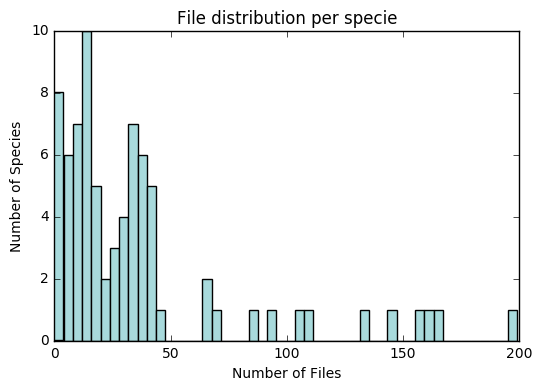

In [6]:
num_files = []

for dir in dirs:
    num_files.append(util.num_files([dir], 'song'))

num_files = np.array(num_files)

plt.hist(num_files,bins=50, color='#A8DADC')  # arguments are passed to np.histogram
plt.title("File distribution per specie")
plt.xlabel("Number of Files")
plt.ylabel("Number of Species")
plt.show()


In [21]:
num_files
print(num_files)
print(np.histogram(num_files, bins=20))

[ 23  11  13  14  33  29  39   8  11  39  19  33  41   2   4  12  27  27
   1  12  10   9  14  11  28  42  12  44   2   7  30  65  33   3  17   8
  42  17   3  32  32  37  16   5  12  35   4   1  13  36   2  32  37  14
  43  37  27  19   7  43 146  12 167   6  21 199  31   0 158  66 133  71
  84  92 111 106 160]
(array([17, 19,  7, 15,  6,  0,  2,  1,  1,  1,  1,  1,  0,  1,  1,  1,  2,
        0,  0,  1]), array([   0.  ,    9.95,   19.9 ,   29.85,   39.8 ,   49.75,   59.7 ,
         69.65,   79.6 ,   89.55,   99.5 ,  109.45,  119.4 ,  129.35,
        139.3 ,  149.25,  159.2 ,  169.15,  179.1 ,  189.05,  199.  ]))
